In [1]:
import numpy as np

In [2]:
data = np.genfromtxt(r'iris.data2.txt',delimiter=',',dtype = 'str')

In [3]:
x = data[:,:4].astype('float')
y = data[:,-1]

In [4]:
flower_class = {}
c = 0
for i in y:
    if i not in flower_class:
        flower_class[i] = c
        c += 1

In [5]:
flower_class

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [6]:
for i,d in enumerate(y):
    y[i] = flower_class[d]

In [7]:
y = y.astype('int32')
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn import neighbors
knn  = neighbors.KNeighborsClassifier()
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
knn.predict([[5. , 3.4, 1.5, 0.2]])

array([0])

In [10]:
b = np.array([])
for i in x:
    b = np.append(b,[i[0]+i[1],i[2]+i[3]])

In [11]:
b = b.reshape(150,2)

In [12]:
b

array([[ 8.6,  1.6],
       [ 7.9,  1.6],
       [ 7.9,  1.5],
       [ 7.7,  1.7],
       [ 8.6,  1.6],
       [ 9.3,  2.1],
       [ 8. ,  1.7],
       [ 8.4,  1.7],
       [ 7.3,  1.6],
       [ 8. ,  1.6],
       [ 9.1,  1.7],
       [ 8.2,  1.8],
       [ 7.8,  1.5],
       [ 7.3,  1.2],
       [ 9.8,  1.4],
       [10.1,  1.9],
       [ 9.3,  1.7],
       [ 8.6,  1.7],
       [ 9.5,  2. ],
       [ 8.9,  1.8],
       [ 8.8,  1.9],
       [ 8.8,  1.9],
       [ 8.2,  1.2],
       [ 8.4,  2.2],
       [ 8.2,  2.1],
       [ 8. ,  1.8],
       [ 8.4,  2. ],
       [ 8.7,  1.7],
       [ 8.6,  1.6],
       [ 7.9,  1.8],
       [ 7.9,  1.8],
       [ 8.8,  1.9],
       [ 9.3,  1.6],
       [ 9.7,  1.6],
       [ 8. ,  1.6],
       [ 8.2,  1.4],
       [ 9. ,  1.5],
       [ 8. ,  1.6],
       [ 7.4,  1.5],
       [ 8.5,  1.7],
       [ 8.5,  1.6],
       [ 6.8,  1.6],
       [ 7.6,  1.5],
       [ 8.5,  2.2],
       [ 8.9,  2.3],
       [ 7.8,  1.7],
       [ 8.9,  1.8],
       [ 7.8,

In [13]:
from sklearn.cross_validation import train_test_split

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
x_train,x_test,y_train,y_test = train_test_split(b,y,test_size = 0.2)

In [15]:
from sklearn import neighbors

In [16]:
knn = neighbors.KNeighborsClassifier()

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
knn.predict([[10.25,3.2]])

array([0])

In [19]:
knn.score(x_test,y_test)

0.9666666666666667

# Creating Algo From Scratch

In [20]:
col = []
d = {0:'r',1:'g',2:'b'}
for i in y:
    col.append(d[i])

In [21]:
import matplotlib.pyplot as plt

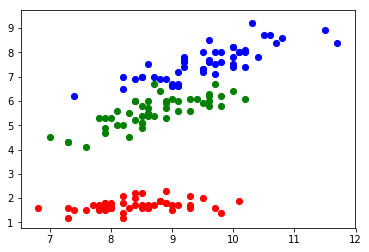

In [22]:
for i,j in zip(b,col):
    plt.scatter(i[0],i[1],c=j,marker = '.',s = 150)
plt.show()

In [23]:
from collections import Counter

In [24]:
def l_sort(x):
    return x[0]
def knn_algo(features,p,k):
    dis = []
    for d,c in zip(features,col):
        dis.append([np.sqrt((d[0]-p[0])**2 + (d[1]-p[1])**2),c])
    dis.sort(key = l_sort,reverse=False)
    P = dis[:k]
    list_g = []
    for i in P:
        list_g.append(i[1])
    l = Counter(list_g).most_common()
    l.sort(reverse = True)
    return l

In [27]:
p = [2,3]
c = knn_algo(b,p,4)

In [28]:
print("Point belongs to :",c[0][0])

Point belongs to : r
